In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
import numpy.linalg as lina
%matplotlib inline


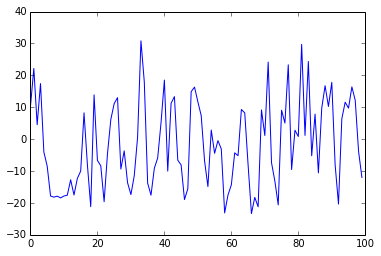

In [41]:
#### generate sample

x0 = 0
x_list =[]
y_list = []
nnn = 100
sigma_v = 2.0
sigma_w = 1.0
x = np.random.normal(1.0)


def our_model(x):
    return x*0.1+ x/(1+x*x)*40.0+np.cos(1.2*x)*15.0

for i in range(nnn):
    x = x*0.1+ x/(1+x*x)*40.0+np.cos(1.2*x)*15.0+np.random.normal(0.0,sigma_v)
    y = x + np.random.normal(0.0,sigma_w)
    x_list.append(x)
    y_list.append(y)

#### plot
plt.plot(x_list)
plt.show()


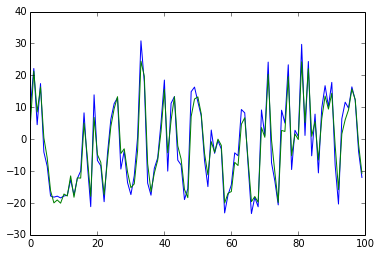

In [46]:
sample_matrix = [np.zeros(20)]
weight_matrix = [np.array([1.0/20 for i in range(20)])]
pred_x = []

sigma_k = sigma_v*sigma_w*1.0/lina.norm([sigma_v,sigma_w])

def my_mean(x,y):
    return np.power(sigma_k,2)*(x*1.0/np.power(sigma_v,2)+y*1.0/np.power(sigma_w,2))

for iii in range(nnn):
    ##### sample x
    ###print [my_mean(i,y_list[iii]) for i in sample_matrix[-1]]
    new_xxx = [np.random.normal(my_mean(i,y_list[iii]),sigma_k) for i in sample_matrix[-1]]
    #### find new w
    num1 = [ st.norm.pdf(y_list[iii],i,sigma_w) for i in sample_matrix[-1]]
    num2 = [st.norm.pdf(i,j,sigma_v) for i,j in zip(new_xxx,sample_matrix[-1])]
    deno1 = [st.norm.pdf(j,my_mean(i,y_list[iii]),sigma_k) for i,j in zip(sample_matrix[-1],new_xxx)]
    new_weight = weight_matrix[-1]*num1*num2*1.0/deno1
    new_weight = new_weight*1.0/np.sum(new_weight)
    #### update x and w 
    sample_matrix.append(new_xxx)
    weight_matrix.append(new_weight)
    #### prediction
    pred_x.append(np.dot(new_weight,new_xxx))

###plt.plot(x_list,c="r")
plt.plot(x_list,c="b")
plt.plot(pred_x,c="g")
plt.show()

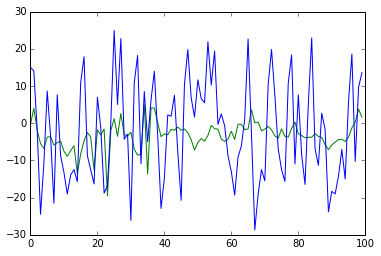

In [37]:
### SIR(not resampling)

sample_matrix = [np.zeros(20)]
weight_matrix = [np.array([1.0/20 for i in range(20)])]
pred_x2=[]
for iii in range(nnn):
    new_xxx = [np.random.normal(i,sigma_v) for i in sample_matrix[-1]]
    num1 = [ st.norm.pdf(y_list[iii],i,sigma_w) for i in sample_matrix[-1]]
    new_weight = weight_matrix[-1]*num1
    new_weight = new_weight*1.0/np.sum(new_weight)
    weight_matrix.append(new_weight)
    sample_matrix.append(new_xxx)
    pred_x2.append(np.dot(new_weight,new_xxx))
plt.plot(pred_x2,c="g")
####plt.plot(pred_x,c="y")
plt.plot(x_list,c="b")
plt.show()